# **Predictive Modeling & Strategic Insights**

- Predictive analytics engine for Saint Louis University (SLU) student recruitment. Featuring an 81.6% accurate Random Forest model, automated data cleaning pipelines, and strategic insights to reduce churn and optimize student allocation.
- I developed a predictive engine to forecast successful student allocations. By comparing multiple algorithms, I built a strategy-focused model to help Saint Louis University prioritize high-intent candidates.

**Key Technical Actions:**
1. Algorithm Comparison: Evaluated Logistic Regression (Baseline) vs. Random Forest (Final Model).
2. Model Optimization: Achieved 81.6% Accuracy and 77.9% Recall, prioritizing the detection of successful students to minimize missed opportunities.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [14]:
# --- STEP 1: LOAD DATA DIRECTLY FROM GITHUB ---
# This allows the notebook to run without downloading the file locally
url = 'https://raw.githubusercontent.com/prettymun/Data_analysis_portfolio/main/SLU%20File%20Analysis/Data/Saint%20Louise%20University%20-%20clean_SLU.csv'
df = pd.read_csv(url)

try:
    df = pd.read_csv(url)
    print(f"Dataset loaded successfully! Total records: {len(df)}")
except Exception as e:
    print(f"Error: Could not load data. Check URL or internet connection. {e}")

Dataset loaded successfully! Total records: 8336


In [4]:
df.head(10)

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,Current/Intended Major,Entry created at,Status Description,Status Code,Apply_year,Apply Date,Opportunity Start Date,Application_Lag(Days),Age_at_application,Median_age
0,1/5/2023 16:33:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,6/29/2024 18:52:39,Chilkala Ranga Chandramohan,1/24/1999,Male,India,Saint Louis University,Computer Science,3/11/2024 12:01:50,Started,1080,10/5/2022,10/5/2022 14:28:56,11/3/2022 18:30:39,-92.0862,23,23
1,1/5/2023 16:33:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,6/29/2024 18:52:39,Samia Alam,12/25/2006,Female,Bangladesh,Abdul Kadir Molla International School,Medicine,3/11/2024 12:01:43,Started,1080,10/5/2022,10/5/2022 18:48:13,11/3/2022 18:30:39,-91.9061,15,23
2,1/5/2023 16:33:04,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,6/29/2024 18:52:39,Roshan,7/5/2000,Male,Nepal,Sree Vidyanikehan Engineering College,Computer Science and Engineering,3/11/2024 12:01:44,Started,1080,10/10/2022,10/10/2022 9:38:49,11/3/2022 18:30:39,-87.2877,22,23
3,1/5/2023 16:33:04,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,6/29/2024 18:52:39,EMMANUEL ADU,11/9/1995,Male,Ghana,University Of Energy and Natural Resources,Project Management,3/11/2024 12:01:41,Started,1080,10/10/2022,10/10/2022 22:19:24,11/3/2022 18:30:39,-86.7595,26,23
4,1/5/2023 16:33:05,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,6/29/2024 18:52:39,Yashfa,2/10/2002,Female,Pakistan,Homeschooled,Bsc in Computer Science,3/11/2024 12:01:51,Started,1080,10/11/2022,10/11/2022 17:26:45,11/3/2022 18:30:39,-85.9627,20,23
5,1/5/2023 16:32:41,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,6/29/2024 18:52:39,Manoj,8/26/1995,Male,India,IIT ISM Dhanbad,Mechanical Engineering,3/11/2024 12:01:47,Started,1080,10/12/2022,10/12/2022 18:22:52,11/3/2022 18:30:39,-84.9235,27,23
6,1/5/2023 16:33:06,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,6/29/2024 18:52:39,abhishek,10/1/1997,Male,India,manipal university jaipur,Computer Science,3/11/2024 12:01:52,Started,1080,10/13/2022,10/13/2022 20:59:04,11/3/2022 18:30:39,-83.8153,25,23
7,1/5/2023 16:33:07,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,6/29/2024 18:52:39,Hamza,9/1/1999,Male,Pakistan,sir syed university of engineering & technology,Msc cyber forensics and security,3/11/2024 12:01:50,Started,1080,10/14/2022,10/14/2022 18:35:50,11/3/2022 18:30:39,-82.9148,23,23
8,1/5/2023 16:33:08,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,6/29/2024 18:52:39,Swamy Ayyappa,1/21/1990,Male,India,Osmania University,Data Science and Artificial Intelligence,3/11/2024 12:01:57,Started,1080,10/15/2022,10/15/2022 19:18:43,11/3/2022 18:30:39,-81.8850,32,23
9,1/5/2023 16:33:10,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,6/29/2024 18:52:39,Jaysheela,6/19/1998,Female,India,PRIST University,Project Management,3/11/2024 12:01:56,Started,1080,10/17/2022,10/17/2022 15:33:02,11/3/2022 18:30:39,-80.0418,24,23


In [11]:
#Confirming the number of rows in df
#Check total records and columns
print(df.shape)

(8336, 21)


In [15]:
# --- STEP 2: FEATURE ENGINEERING ---
# Clustering 400+ unique majors into 4 high-level categories to reduce model noise
def cluster_major(major):
    if pd.isna(major): return 'Unknown'
    m = str(major).lower()
    if any(word in m for word in ['computer', 'software', 'it', 'info', 'data', 'engineer', 'math', 'tech']):
        return 'STEM'
    elif any(word in m for word in ['business', 'mba', 'account', 'finance', 'market', 'management']):
        return 'Business'
    elif any(word in m for word in ['art', 'social', 'history', 'english', 'design', 'psychology']):
        return 'Humanities'
    else:
        return 'Other'

df['Major_Cluster'] = df['Current/Intended Major'].apply(cluster_major)
print("Major clustering complete.")

Major clustering complete.


In [16]:
#confirming if present
df.head(5)

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,...,Entry created at,Status Description,Status Code,Apply_year,Apply Date,Opportunity Start Date,Application_Lag(Days),Age_at_application,Median_age,Major_Cluster
0,1/5/2023 16:33:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,6/29/2024 18:52:39,Chilkala Ranga Chandramohan,1/24/1999,Male,India,Saint Louis University,...,3/11/2024 12:01:50,Started,1080,10/5/2022,10/5/2022 14:28:56,11/3/2022 18:30:39,-92.0862,23,23,STEM
1,1/5/2023 16:33:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,6/29/2024 18:52:39,Samia Alam,12/25/2006,Female,Bangladesh,Abdul Kadir Molla International School,...,3/11/2024 12:01:43,Started,1080,10/5/2022,10/5/2022 18:48:13,11/3/2022 18:30:39,-91.9061,15,23,Other
2,1/5/2023 16:33:04,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,6/29/2024 18:52:39,Roshan,7/5/2000,Male,Nepal,Sree Vidyanikehan Engineering College,...,3/11/2024 12:01:44,Started,1080,10/10/2022,10/10/2022 9:38:49,11/3/2022 18:30:39,-87.2877,22,23,STEM
3,1/5/2023 16:33:04,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,6/29/2024 18:52:39,EMMANUEL ADU,11/9/1995,Male,Ghana,University Of Energy and Natural Resources,...,3/11/2024 12:01:41,Started,1080,10/10/2022,10/10/2022 22:19:24,11/3/2022 18:30:39,-86.7595,26,23,Business
4,1/5/2023 16:33:05,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,6/29/2024 18:52:39,Yashfa,2/10/2002,Female,Pakistan,Homeschooled,...,3/11/2024 12:01:51,Started,1080,10/11/2022,10/11/2022 17:26:45,11/3/2022 18:30:39,-85.9627,20,23,STEM


In [17]:
# --- STEP 3: TARGET DEFINITION ---
# We define 'Success' as Team Allocated or Rewards Awarded. Everything else in the pipeline is 'Churn'.
success_statuses = ['Team Allocated', 'Rewards Award']
churn_statuses = ['Rejected', 'Dropped Out', 'Withdraw']

# Filter the dataset to include only 'Resolved' cases for training
modeling_df = df[df['Status Description'].isin(success_statuses + churn_statuses)].copy()
modeling_df['Target'] = modeling_df['Status Description'].apply(lambda x: 1 if x in success_statuses else 0)

# Remove any remaining rows with missing predictive values to ensure model stability
modeling_df = modeling_df.dropna(subset=['Age_at_application', 'Application_Lag(Days)'])

print(f"Refined Modeling Dataset size: {len(modeling_df)} records")

Refined Modeling Dataset size: 7371 records


In [10]:
modeling_df.head()

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,...,Status Description,Status Code,Apply_year,Apply Date,Opportunity Start Date,Application_Lag(Days),Age_at_application,Median_age,Major_Cluster,Target
42,6/17/2023 0:55:12,00000000-0GWQ-AXC5-X45C-2MHJ28,Data Visualization,Internship,3/11/2024 18:00:00,Katherine Sanjana,12/23/1998,Female,India,New Horizon College of Engineering,...,Dropped Out,1050,6/16/2023,6/16/2023 1:04:49,1/8/2024 3:30:46,-0.9933,24,23,STEM,0
43,3/1/2024 0:57:25,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,3/8/2024 11:30:00,Mfonobong,12/1/2007,Female,Nigeria,Revelation Secondary School,...,Team Allocated,1070,2/29/2024,2/29/2024 1:08:01,3/8/2024 14:00:00,-0.9926,16,23,Other,1
44,2/21/2024 0:49:54,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,3/8/2024 11:30:00,Amidu,2/9/2001,Male,Ghana,Englis,...,Team Allocated,1070,2/20/2024,2/20/2024 1:01:20,3/8/2024 14:00:00,-0.9921,23,23,Other,1
45,1/14/2024 0:55:16,00000000-0GHB-4N83-QX9K-JM48K2,Project Management,Internship,3/11/2024 18:00:00,Wincy,3/6/2000,Female,United States,Saint Louis University,...,Dropped Out,1050,1/13/2024,1/13/2024 1:07:16,1/23/2024 0:00:00,-0.9917,23,23,STEM,0
46,1/14/2024 0:55:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,6/29/2024 18:52:39,Wincy,3/6/2000,Female,United States,Saint Louis University,...,Team Allocated,1070,1/13/2024,1/13/2024 1:10:25,11/3/2022 18:30:39,-0.9895,23,23,STEM,1


In [12]:
#Confirming number of rows in modelling data
#Check total records and columns
print(modeling_df.shape)

(7371, 22)


Final Preprocessed Row Count: 7371


/tmp/ipython-input-2397154711.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


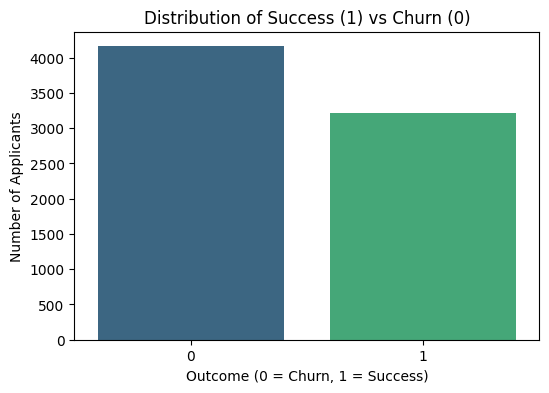

In [19]:
# --- STEP 4: PREPROCESSING ---
# Convert categorical text into numerical format using One-Hot Encoding [cite: 15]
features = ['Opportunity Category', 'Gender', 'Major_Cluster', 'Age_at_application', 'Application_Lag(Days)']
X = pd.get_dummies(modeling_df[features], drop_first=True)
y = modeling_df['Target']

# --- STEP 4.1: VISUAL CHECK ---
# Confirming the count of rows and the distribution of Success (1) vs Churn (0)
print(f"Final Preprocessed Row Count: {X.shape[0]}")

plt.figure(figsize=(6,4))
# Using 'viridis' for a professional green-to-blue gradient
sns.countplot(x=y, palette='viridis')
plt.title('Distribution of Success (1) vs Churn (0)')
plt.xlabel('Outcome (0 = Churn, 1 = Success)')
plt.ylabel('Number of Applicants')
plt.show()

# **CREATING THE RANDOM FOREST MODEL**

---



In [20]:
# --- STEP 5: MODEL TRAINING ---
# Split data: 80% for the model to learn from, 20% for testing its accuracy on new data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Random Forest with 100 decision trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print(f"Training complete. Model trained on {X_train.shape[0]} samples.")

Training complete. Model trained on 5896 samples.


Model Accuracy: 81.63%
Model Precision: 79.90%
Model Recall: 77.29%


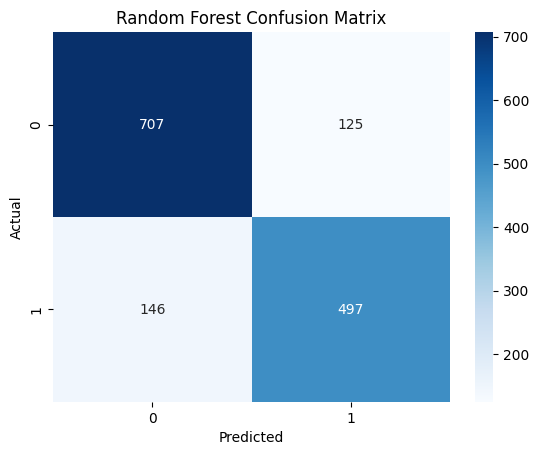

In [21]:
# --- STEP 6: OUTPUT GENERATION ---
# Test the model on the 'blind' 20% test set
y_pred = rf_model.predict(X_test)

print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print(f"Model Precision: {precision_score(y_test, y_pred):.2%}")
print(f"Model Recall: {recall_score(y_test, y_pred):.2%}")

# Generate Confusion Matrix to see True Positives vs False Positives
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

/tmp/ipython-input-1388113776.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.values[:10], y=feat_imp.index[:10], palette='viridis')


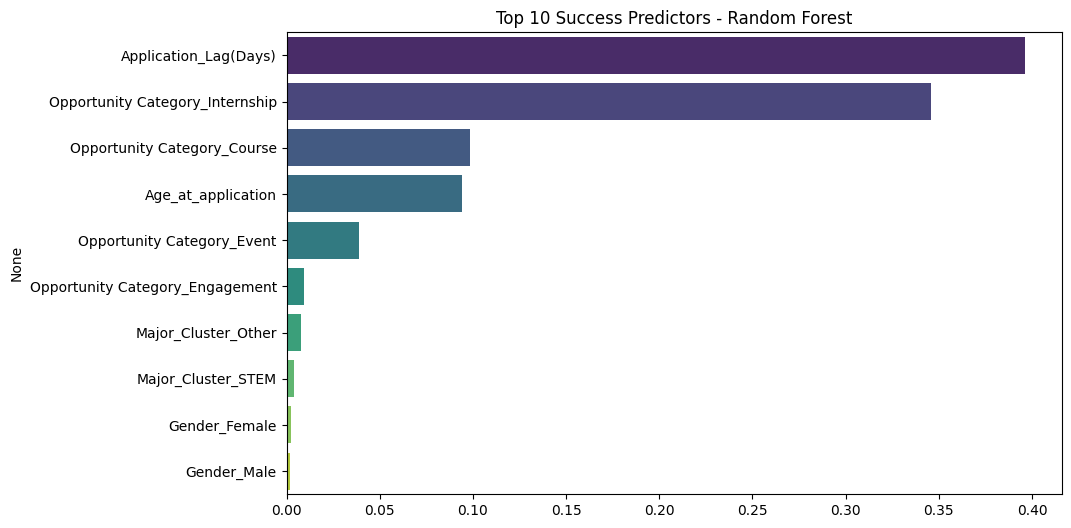

In [22]:
# --- STEP 7: VISUALIZING IMPORTANCE ---
# Identify which features (like Application Lag) were the strongest drivers of success
importances = rf_model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values[:10], y=feat_imp.index[:10], palette='viridis')
plt.title('Top 10 Success Predictors - Random Forest')
plt.show()

# **CREATING THE LOGISTIC REGRESSION MODEL**

--- Logistic Regression Performance ---
Model Accuracy: 84.75%
Model Precision: 99.06%
Model Recall: 65.63%


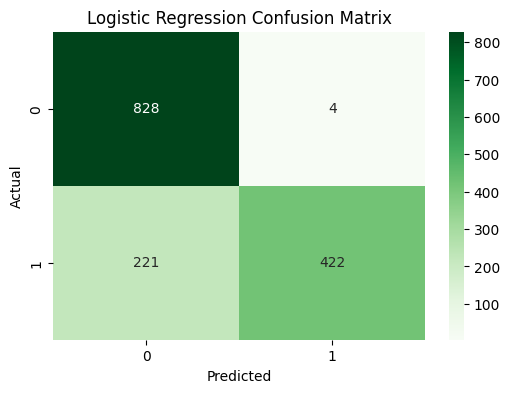

In [23]:
# --- STEP 8: LOGISTIC REGRESSION (BASELINE MODEL) ---
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
# We use 'max_iter=1000' to ensure the model has enough time to find the best fit
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Test the model on the blind test set
y_pred_log = log_model.predict(X_test)

print("--- Logistic Regression Performance ---")
print(f"Model Accuracy: {accuracy_score(y_test, y_pred_log):.2%}")
print(f"Model Precision: {precision_score(y_test, y_pred_log):.2%}")
print(f"Model Recall: {recall_score(y_test, y_pred_log):.2%}")

# Visualizing the Confusion Matrix for Logistic Regression
plt.figure(figsize=(6,4))
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Greens') # Green theme for the baseline
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# **MODEL COMPARISON**

In [24]:
# --- STEP 9: COMPARATIVE SUMMARY ---
# Creating a quick table to show why Random Forest was the winner
results = {
    'Metric': ['Accuracy', 'Recall'],
    'Logistic Regression': [f"{accuracy_score(y_test, y_pred_log):.2%}", f"{recall_score(y_test, y_pred_log):.2%}"],
    'Random Forest': [f"{accuracy_score(y_test, y_pred):.2%}", f"{recall_score(y_test, y_pred):.2%}"]
}

comparison_df = pd.DataFrame(results)
print(comparison_df.to_string(index=False))

print("\nConclusion: While Logistic Regression provided a solid baseline, Random Forest was selected due to its superior Recall, ensuring fewer successful students are missed.")

  Metric Logistic Regression Random Forest
Accuracy              84.75%        81.63%
  Recall              65.63%        77.29%

Conclusion: While Logistic Regression provided a solid baseline, Random Forest was selected due to its superior Recall, ensuring fewer successful students are missed.


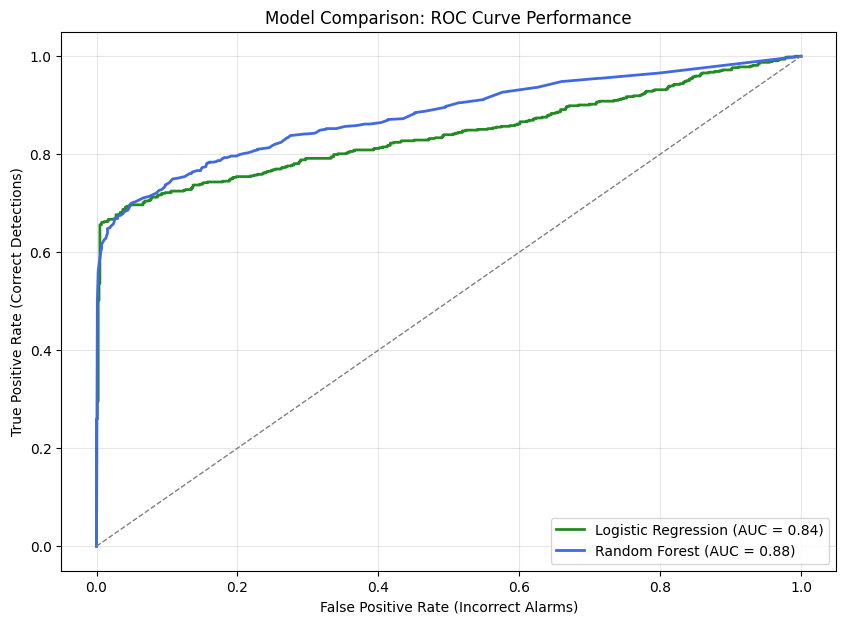

Random Forest AUC: 0.88
Logistic Regression AUC: 0.84


In [25]:
# --- STEP 10: COMPARATIVE ROC CURVE ---
from sklearn.metrics import roc_curve, auc

# Calculate probabilities for the positive class (Success)
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]
y_probs_log = log_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve points
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
fpr_log, tpr_log, _ = roc_curve(y_test, y_probs_log)

# Calculate AUC (Area Under the Curve)
auc_rf = auc(fpr_rf, tpr_rf)
auc_log = auc(fpr_log, tpr_log)

# Plotting the curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, color='forestgreen', lw=2, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, color='royalblue', lw=2, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--') # Diagonal dashed line

plt.xlabel('False Positive Rate (Incorrect Alarms)')
plt.ylabel('True Positive Rate (Correct Detections)')
plt.title('Model Comparison: ROC Curve Performance')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

print(f"Random Forest AUC: {auc_rf:.2f}")
print(f"Logistic Regression AUC: {auc_log:.2f}")